<a href="https://colab.research.google.com/github/motorio0829/DL-for-AI/blob/main/chapter05_fundamentals_of_ml_i%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
train_images_with_noise_channels.shape

(60000, 1568)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_original = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split = 0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6971 - loss: 1.0665 - val_accuracy: 0.8792 - val_loss: 0.3796
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9123 - loss: 0.2729 - val_accuracy: 0.9454 - val_loss: 0.1778
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9463 - loss: 0.1740 - val_accuracy: 0.9462 - val_loss: 0.1758
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9614 - loss: 0.1229 - val_accuracy: 0.9567 - val_loss: 0.1439
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9736 - loss: 0.0850 - val_accuracy: 0.9613 - val_loss: 0.1300
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9800 - loss: 0.0650 - val_accuracy: 0.9650 - val_loss: 0.1251
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9856 - loss: 0.0465 - val_accuracy: 0.9683 - val_loss: 0.1130
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9907 - loss: 0.0319 - val_accuracy: 0.

**Plotting a validation accuracy comparison**

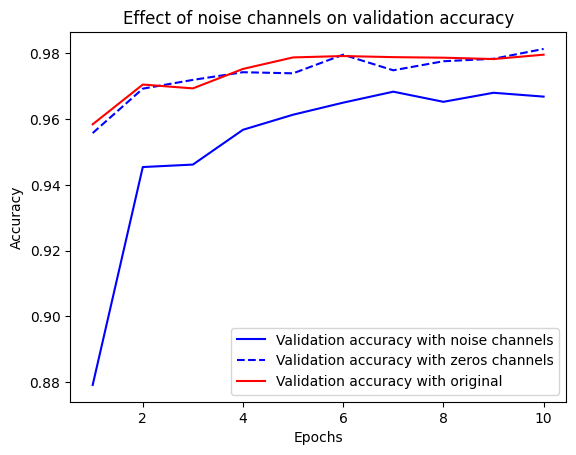

In [9]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_original = history_original.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_original, "r-",
         label="Validation accuracy with original")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [12]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_shuffle = model.fit(train_images, random_train_labels,
          epochs=50,
          batch_size=128,
          validation_split=0.2)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1020 - loss: 2.3291 - val_accuracy: 0.1072 - val_loss: 2.3044
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1169 - loss: 2.2976 - val_accuracy: 0.1058 - val_loss: 2.3101
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1289 - loss: 2.2886 - val_accuracy: 0.1026 - val_loss: 2.3159
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1414 - loss: 2.2751 - val_accuracy: 0.0982 - val_loss: 2.3234
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1551 - loss: 2.2601 - val_accuracy: 0.0981 - val_loss: 2.3315
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1668 - loss: 2.2410 - val_accuracy: 0.0990 - val_loss: 2.3454
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1819 - loss: 2.2183 - val_accuracy: 0.0977 - val_loss: 2.3709
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2027 - loss: 2.1889 - val_accuracy: 0.

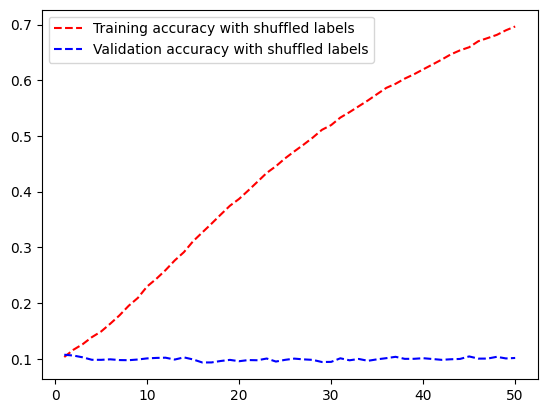

In [24]:
train_acc_shuffle = history_shuffle.history['accuracy']
val_acc_shuffle = history_shuffle.history['val_accuracy']
epochs = range(1, 51)
plt.plot(epochs, train_acc_shuffle, "r--",
         label="Training accuracy with shuffled labels")
plt.plot(epochs, val_acc_shuffle, "b--",
         label="Validation accuracy with shuffled labels")
plt.legend()
plt.show()

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [30]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4105 - loss: 2299.2710 - val_accuracy: 0.2246 - val_loss: 2.4831
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2181 - loss: 2.8344 - val_accuracy: 0.2087 - val_loss: 2.1941
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2179 - loss: 2.7147 - val_accuracy: 0.2105 - val_loss: 2.2207
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2165 - loss: 2.4438 - val_accuracy: 0.2146 - val_loss: 2.2485
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2212 - loss: 2.4462 - val_accuracy: 0.2514 - val_loss: 2.2686
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2190 - loss: 2.3140 - val_accuracy: 0.2167 - val_loss: 2.1938
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2196 - loss: 2.2211 - val_accuracy: 0.1928 - val_loss: 2.2393
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2107 - loss: 2.5494 - val_accuracy:

**The same model with a more appropriate learning rate**

In [31]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8408 - loss: 0.8563 - val_accuracy: 0.9531 - val_loss: 0.1694
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9653 - loss: 0.1236 - val_accuracy: 0.9602 - val_loss: 0.1620
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9732 - loss: 0.1009 - val_accuracy: 0.9676 - val_loss: 0.1440
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9799 - loss: 0.0730 - val_accuracy: 0.9706 - val_loss: 0.1378
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9848 - loss: 0.0590 - val_accuracy: 0.9718 - val_loss: 0.1514
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9872 - loss: 0.0496 - val_accuracy: 0.9735 - val_loss: 0.1765
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9869 - loss: 0.0559 - val_accuracy: 0.9700 - val_loss: 0.1908
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9895 - loss: 0.0458 - val_accuracy: 0.

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [32]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7364 - loss: 1.0489 - val_accuracy: 0.9040 - val_loss: 0.3602
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8972 - loss: 0.3735 - val_accuracy: 0.9149 - val_loss: 0.3111
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9119 - loss: 0.3170 - val_accuracy: 0.9187 - val_loss: 0.2924
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9156 - loss: 0.3029 - val_accuracy: 0.9211 - val_loss: 0.2840
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9198 - loss: 0.2909 - val_accuracy: 0.9223 - val_loss: 0.2794
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9193 - loss: 0.2855 - val_accuracy: 0.9236 - val_loss: 0.2756
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9212 - loss: 0.2792 - val_accuracy: 0.9254 - val_loss: 0.2724
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9200 - loss: 0.2789 - val_accuracy: 0.

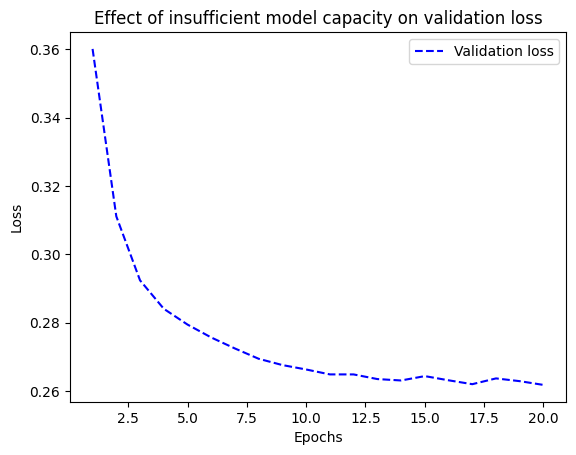

In [33]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [34]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8279 - loss: 0.6205 - val_accuracy: 0.9497 - val_loss: 0.1798
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9505 - loss: 0.1672 - val_accuracy: 0.9596 - val_loss: 0.1417
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9651 - loss: 0.1161 - val_accuracy: 0.9632 - val_loss: 0.1226
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9730 - loss: 0.0886 - val_accuracy: 0.9698 - val_loss: 0.1068
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9802 - loss: 0.0662 - val_accuracy: 0.9709 - val_loss: 0.0983
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9830 - loss: 0.0574 - val_accuracy: 0.9700 - val_loss: 0.1024
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9859 - loss: 0.0464 - val_accuracy: 0.9748 - val_loss: 0.0936
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9880 - loss: 0.0367 - val_accuracy: 0

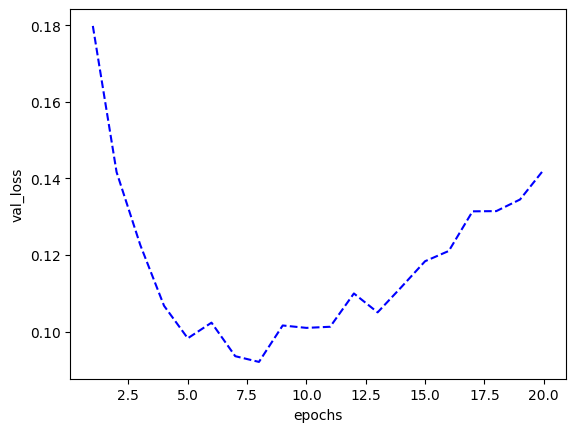

In [37]:
epochs = range(1,21)
plt.plot(epochs, history_large_model.history['val_loss'], 'b--')
plt.xlabel('epochs')
plt.ylabel('val_loss')
plt.show()

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [38]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.6881 - loss: 0.6074 - val_accuracy: 0.8412 - val_loss: 0.4238
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8878 - loss: 0.3582 - val_accuracy: 0.8835 - val_loss: 0.3189
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9163 - loss: 0.2643 - val_accuracy: 0.8876 - val_loss: 0.2886
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9320 - loss: 0.2090 - val_accuracy: 0.8898 - val_loss: 0.2762
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9446 - loss: 0.1680 - val_accuracy: 0.8909 - val_loss: 0.2731
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9535 - loss: 0.1444 - val_accuracy: 0.8811 - val_loss: 0.3008
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9575 - loss: 0.1326 - val_accuracy: 0.8847 - val_loss: 0.2930
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accura

**Version of the model with lower capacity**

In [39]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.6128 - loss: 0.6753 - val_accuracy: 0.7520 - val_loss: 0.6184
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7461 - loss: 0.5985 - val_accuracy: 0.7953 - val_loss: 0.5740
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8028 - loss: 0.5501 - val_accuracy: 0.7852 - val_loss: 0.5417
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8310 - loss: 0.5139 - val_accuracy: 0.8229 - val_loss: 0.5169
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8585 - loss: 0.4852 - val_accuracy: 0.8252 - val_loss: 0.4989
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8782 - loss: 0.4583 - val_accuracy: 0.8633 - val_loss: 0.4816
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8946 - loss: 0.4408 - val_accuracy: 0.8425 - val_loss: 0.4733
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9009 - loss: 0.4209 - val_accuracy: 0.8551 - 

**Version of the model with higher capacity**

In [40]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.6606 - loss: 0.6483 - val_accuracy: 0.8063 - val_loss: 0.4159
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8465 - loss: 0.3592 - val_accuracy: 0.8597 - val_loss: 0.3338
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9076 - loss: 0.2370 - val_accuracy: 0.8741 - val_loss: 0.3024
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9365 - loss: 0.1741 - val_accuracy: 0.8868 - val_loss: 0.2871
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9443 - loss: 0.1523 - val_accuracy: 0.8884 - val_loss: 0.2873
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9690 - loss: 0.0953 - val_accuracy: 0.8851 - val_loss: 0.3377
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9717 - loss: 0.0856 - val_accuracy: 0.8562 - val_loss: 0.4881
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9590 - loss: 0.1027 - val_accuracy: 0.8818 - 

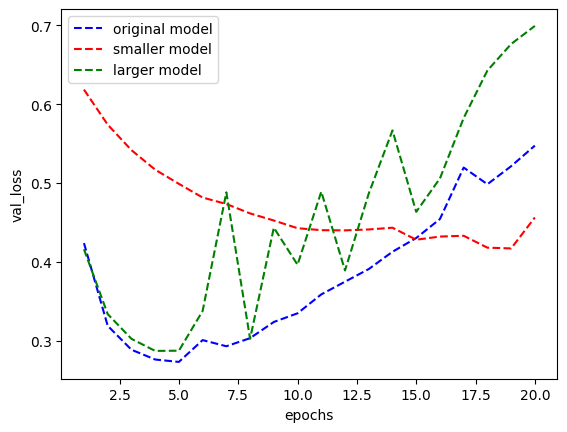

In [45]:
epochs = range(1,21)
plt.plot(epochs, history_original.history['val_loss'], 'b--', label='original model')
plt.plot(epochs, history_smaller_model.history['val_loss'], 'r--', label='smaller model')
plt.plot(epochs, history_larger_model.history['val_loss'], 'g--', label='larger model')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('val_loss')
plt.show()

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [46]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.7076 - loss: 0.7005 - val_accuracy: 0.8609 - val_loss: 0.5141
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8847 - loss: 0.4615 - val_accuracy: 0.8813 - val_loss: 0.4090
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9117 - loss: 0.3567 - val_accuracy: 0.8882 - val_loss: 0.3718
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9264 - loss: 0.3126 - val_accuracy: 0.8868 - val_loss: 0.3598
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9301 - loss: 0.2878 - val_accuracy: 0.8837 - val_loss: 0.3614
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9420 - loss: 0.2599 - val_accuracy: 0.8870 - val_loss: 0.3534
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9447 - loss: 0.2520 - val_accuracy: 0.8851 - val_loss: 0.3614
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9489 - loss: 0.2416 - val_accuracy: 0.8840 - 

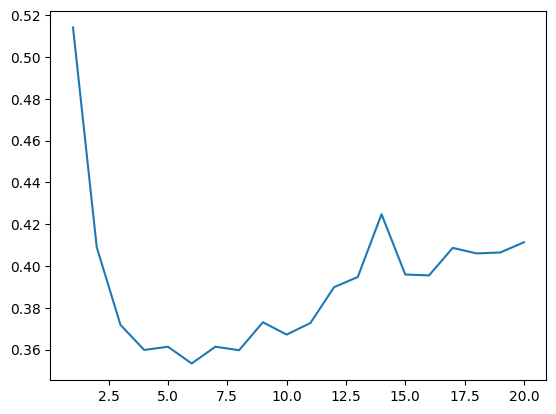

In [48]:
plt.plot(epochs, history_l2_reg.history['val_loss'])
plt.show()

**Different weight regularizers available in Keras**

In [49]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [55]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.5926 - loss: 0.6585 - val_accuracy: 0.8298 - val_loss: 0.4900
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7698 - loss: 0.5011 - val_accuracy: 0.8758 - val_loss: 0.3814
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8354 - loss: 0.4138 - val_accuracy: 0.8836 - val_loss: 0.3264
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8640 - loss: 0.3545 - val_accuracy: 0.8824 - val_loss: 0.2980
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8952 - loss: 0.2929 - val_accuracy: 0.8896 - val_loss: 0.2805
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9112 - loss: 0.2661 - val_accuracy: 0.8878 - val_loss: 0.2798
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9222 - loss: 0.2304 - val_accuracy: 0.8889 - val_loss: 0.2841
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9388 - loss: 0.1953 - val_accuracy: 0.8897 - 

In [58]:
model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    #layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    #layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_simple = model2.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.6938 - loss: 0.5947 - val_accuracy: 0.8662 - val_loss: 0.3804
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8916 - loss: 0.3241 - val_accuracy: 0.8819 - val_loss: 0.3093
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9251 - loss: 0.2329 - val_accuracy: 0.8900 - val_loss: 0.2788
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9393 - loss: 0.1842 - val_accuracy: 0.8804 - val_loss: 0.2983
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9487 - loss: 0.1552 - val_accuracy: 0.8908 - val_loss: 0.2760
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9610 - loss: 0.1305 - val_accuracy: 0.8610 - val_loss: 0.3729
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9626 - loss: 0.1157 - val_accuracy: 0.8847 - val_loss: 0.3053
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9727 - loss: 0.0969 - val_accuracy: 0.8843 - 

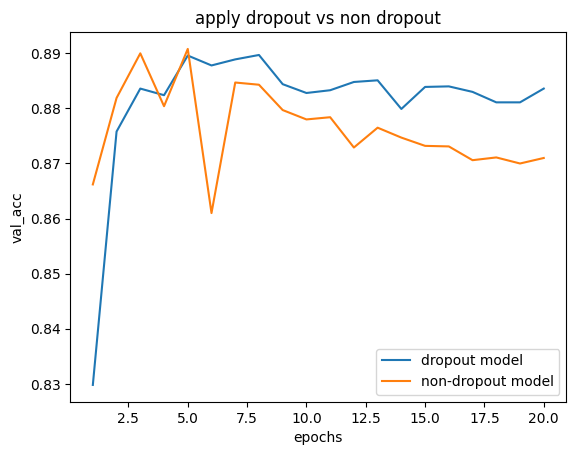

In [63]:
plt.plot(epochs, history_dropout.history['val_accuracy'], label = 'dropout model')
plt.xlabel('epochs')
plt.ylabel('val_acc')
plt.title('apply dropout vs non dropout')
plt.plot(epochs, history_simple.history['val_accuracy'], label = 'non-dropout model')
plt.legend()
plt.show()

## Summary